***

# Homework 3

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Question 1.

**Consider the linear Gaussian model,**

$$dX_t = (−aX_t + f_t)\;d_t + \sigma \; dW_t,$$

**where $a > 0$ and $\sigma > 0$ are constants, and $f_t$ can depend on time.**

**Derive the time evolution of the second-order moment $\langle X_t^2 \rangle$.**

*For time evolution of the first-order moment:*

As expectation is a linear function, i.e., $\mathbb{E}[aX + b] = a\mathbb{E}[X] + b$, we have that:
$$\frac{d}{dt} \langle X(t) \rangle = \frac{d}{dt} \mathbb{E}[X(t)] \iff \frac{d}{dt} \langle X(t) \rangle = \mathbb{E}\bigg[\frac{d}{dt} X(t)\bigg]$$

Now, we can apply Ito's lemma for $f(X_t) = X(t)$ as follows:
\begin{equation*}
    \begin{split}
        d\;X(t) &= 1 \cdot dX(t) + \frac{1}{2} \cdot 2 \cdot (dX(t))^2\\
        \\
                 &= [(-aX(t) + f_t)\;dt + \sigma\;dW(t)] + [(-a \cdot X(t) + f_t)\;dt + \sigma\;dW(t)]^2\\
        \\
                  &= [(−aX(t) + f_t)\;d_t + \sigma \; dW_t] + [(−aX(t) + f_t)^2\;(d_t)^2 + \sigma^2 \; dW^2_t + 2(−aX(t) + f_t)\cdot \sigma\;d_t\;dW_t]\\
    \end{split}
\end{equation*}

Now, we know that $d_t\;dW_t \approx 0, (d_t)^2 \approx 0$, and $(dW_t)^2 = dt$
\begin{equation*}
    \begin{split}
        d\;X_t  &= [(−aX(t) + f_t)\;dt + \sigma \; dW_t] + [\sigma^2 \; dt]\\
    \end{split}
\end{equation*}

Substituting the above, we have that:
\begin{equation*}
    \begin{split}
        \frac{d}{dt} \mathbb{E}[X(t)] &= \mathbb{E}\bigg[\frac{d}{dt} X(t)\bigg]\\
                                      &= \mathbb{E}[(-aX(t) + f_t)]\\
                                      &= -a \cdot \mathbb{E}[X(t)] + f_t\\
    \end{split}
\end{equation*}

*For time evolution of the second-order moment:*

As expectation is a linear function, i.e., $\mathbb{E}[aX + b] = a\mathbb{E}[X] + b$, we have that:
$$\frac{d}{dt} \langle X_t^2 \rangle = \frac{d}{dt} \mathbb{E}[X^2_t] \iff \frac{d}{dt} \langle X_t^2 \rangle = \mathbb{E}\bigg[\frac{d}{dt} (X^2_t)\bigg]$$

Now, we can apply Ito's lemma for $f(X_t) = X^2_t$ as follows:
\begin{equation*}
    \begin{split}
        d\;X^2_t &= 2 X_t \cdot dX_t + \frac{1}{2} \cdot 2 \cdot (dX_t)^2\\
        \\
                 &= 2 X_t \cdot [(−aX_t + f_t)\;d_t + \sigma \; dW_t] + [(−aX_t + f_t)\;d_t + \sigma \; dW_t]^2\\
        \\
                  &= 2 X_t \cdot [(−aX_t + f_t)\;d_t + \sigma \; dW_t] + [(−aX_t + f_t)^2\;(d_t)^2 + \sigma^2 \; dW^2_t + 2(−aX_t + f_t)\cdot \sigma\;d_t\;dW_t]\\
    \end{split}
\end{equation*}

Now, we know that $d_t\;dW_t \approx 0, (d_t)^2 \approx 0$, and $(dW_t)^2 = dt$
\begin{equation*}
    \begin{split}
        d\;X^2_t  &= 2 X_t \cdot [(−aX_t + f_t)\;d_t + \sigma \; dW_t] + \sigma^2 \; d_t\\
                  &= 2 X_t \cdot [(-aX_t + f_t) + \sigma^2]\;dt + 2 \sigma X_t\;dW_t
    \end{split}
\end{equation*}

Substituting the above, we have that:
\begin{equation*}
    \begin{split}
        \frac{d}{dt} \mathbb{E}[X_t^2]  &= \mathbb{E}\bigg[\frac{d}{dt} (X^2_t)\bigg]\\
                                        &= \mathbb{E}\bigg[ 2 X_t \cdot [(-aX_t + f_t) + \sigma^2] \bigg]\\
                                        &= \mathbb{E}[-2a X^2_t + 2X_t f_t + \sigma^2]\\
                                        &= -2a \cdot \mathbb{E}[X^2_t] + 2\mathbb{E}[X_t f_t] + \sigma^2\\
    \end{split}
\end{equation*}

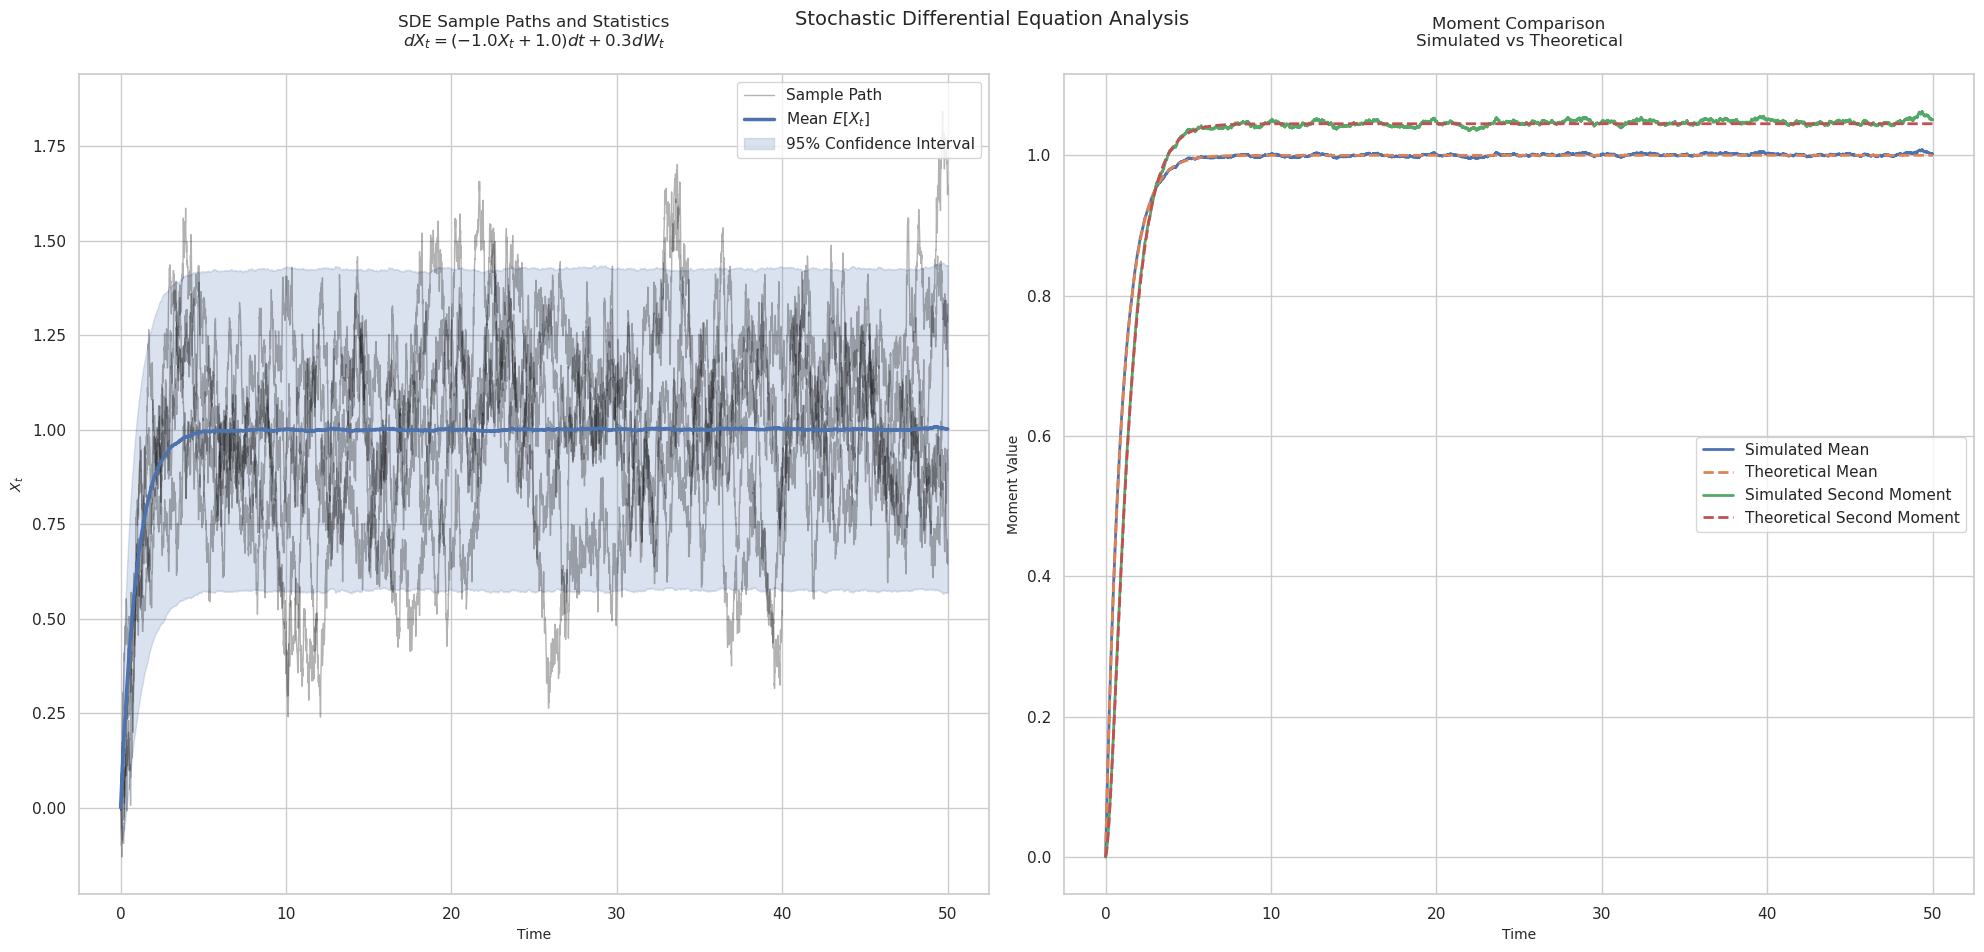

In [2]:
# Define the SDE function
def dXt(Xt, dt, dWt, a, f):
    return (-a * Xt + f) * dt + dWt

# Euler-Maruyama method to simulate paths
def euler_maruyama(T, N, X0, a, f, sigma, num_simulations):
    dt = T / N
    t = np.linspace(0, T, N + 1)
    Xt = np.zeros((num_simulations, N + 1))
    Xt[:, 0] = X0  # Initial condition
    
    for i in range(1, N + 1):
        dW = np.sqrt(dt) * np.random.randn(num_simulations) * sigma         # Wiener process increment
        Xt[:, i] = Xt[:, i - 1] + dXt(Xt[:, i - 1], dt, dW, a, f)           # Euler-Maruyama scheme
    
    return t, Xt

# Define the differential equation for d(EX_t)/dt (first moment)
def question_1_d_dt_first_moment(a, EXt, f):
    return (-a*EXt + f)

# Define the differential equation for d(EX_t^2)/dt (second moment)
def question_1_d_dt_second_moment(a, EXt, EXt2, f, sigma):
    return (-2*a*EXt2 + 2*EXt*f + sigma**2)

# Define the Forward Euler method for both first and second moments
def question_1_forward_euler_moments(a, f, sigma, m_0, m2_0, dt, T):
    time_steps = int(T / dt)
    m_values = np.zeros(time_steps + 1)    # First moment values
    m2_values = np.zeros(time_steps + 1)   # Second moment values
    t_values = np.linspace(0, T, time_steps + 1)
    
    # Initial conditions
    m_values[0] = m_0
    m2_values[0] = m2_0
    
    # Euler method loop for both moments
    for i in range(1, time_steps + 1):
        
        # Update first moment (mean) using its differential equation
        m_values[i] = m_values[i - 1] + dt * question_1_d_dt_first_moment(a, m_values[i - 1], f)
        
        # Update second moment using its differential equation
        m2_values[i] = m2_values[i - 1] + dt * question_1_d_dt_second_moment(a, m_values[i - 1], m2_values[i - 1], f, sigma)
    
    return t_values, m_values, m2_values

# Parameters
a = 1.0                  # damping coefficient
sigma = 0.3              # diffusion coefficient
f = 1.0                  # constant forcing term
X0 = 0.0                 # initial condition
T = 50.0                 # total time
dt = 0.01                # time step
N = int(T / dt)          # number of steps
num_simulations = 10000  # number of simulation paths

# Run simulations
time, X_paths = euler_maruyama(T, N, X0, a, f, sigma, num_simulations)
E_X = np.mean(X_paths, axis=0)      # first moment (mean)
E_X2 = np.mean(X_paths**2, axis=0)  # second moment

# Run Forward Euler for moments
t_values, m_values, m2_values = question_1_forward_euler_moments(a, f, sigma, X0, X0**2, dt, T)

# Set modern styling
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with two subplots
fig = plt.figure(figsize=(20, 10))

# First subplot: Sample paths and statistics
ax1 = plt.subplot(121)
std_dev = np.std(X_paths, axis=0)

for i in range(5):
    ax1.plot(time, X_paths[i], alpha=0.3, linewidth=1, color="black", 
             label='Sample Path' if i == 0 else "")

# Plot mean and confidence intervals
ax1.plot(time, E_X, color=sns.color_palette("deep")[0], linewidth=2.5, 
         label='Mean $E[X_t]$')
ax1.fill_between(time, 
                 E_X - 2*std_dev, 
                 E_X + 2*std_dev,
                 color=sns.color_palette("deep")[0],
                 alpha=0.2,
                 label='95% Confidence Interval')

ax1.set_title('SDE Sample Paths and Statistics\n' + 
              f'$dX_t = (-{a}X_t + {f})dt + {sigma}dW_t$', 
              fontsize=12, 
              pad=20)
ax1.set_xlabel('Time', fontsize=10)
ax1.set_ylabel('$X_t$', fontsize=10)
ax1.legend(loc='upper right')

# Second subplot: Moment comparison
ax2 = plt.subplot(122)

# Plot first and second moments
ax2.plot(time, E_X, linewidth=2, label='Simulated Mean')
ax2.plot(t_values, m_values, linewidth=2, 
         linestyle='--', label='Theoretical Mean')
ax2.plot(time, E_X2, linewidth=2, 
         label='Simulated Second Moment')
ax2.plot(t_values, m2_values, linewidth=2, 
         linestyle='--', label='Theoretical Second Moment')

ax2.set_title('Moment Comparison\nSimulated vs Theoretical', fontsize=12, pad=20)
ax2.set_xlabel('Time', fontsize=10)
ax2.set_ylabel('Moment Value', fontsize=10)
ax2.legend(loc='center right')

# Add a super title
plt.suptitle('Stochastic Differential Equation Analysis', fontsize=14, y=0.95)

# Adjust layout
plt.tight_layout()
plt.show()

# Question 2.

**Consider the linear model with multiplicative noise:**

$$d\,x(t) = [−a \cdot x(t) + f]\;dt + b \cdot x(t)\;dW_{b}(t) + c\;dWc(t)$$

**Use the parameters: $a = 5, b = 1, c = 0.3, f = 0.9$. The initial value is deterministic $x(0) = 1.$**

## (a.)

**Derive the moment equations for the time evolution of mean, variance, skewness and
kurtosis.**

The equation (7.16) from the notes, we have that:
$$d\;\mathbb{E}[X^n(t)] = \bigg[\bigg(-n \cdot a + \frac{n(n-1)}{2} \cdot b^2\bigg) \cdot \mathbb{E}[X^n(t)] + n \cdot f \cdot \mathbb{E}[X^{n-1}(t)] + \frac{n(n-1)}{2} \cdot c^2 \cdot \mathbb{E}[X^{n-2}(t)]\bigg]\;dt$$

*For time-evolution of the first moment (mean), i.e., $n=1$:*

Applying the equation (7.16), we have that:
\begin{equation*}
    \begin{split}
        d\;\mathbb{E}[X^1(t)] &= \bigg[\bigg(-1 \cdot a + \underbrace{\frac{1(1-1)}{2}}_{=0} \cdot b^2\bigg) \cdot \mathbb{E}[X^1(t)] + 1 \cdot f \cdot \underbrace{\mathbb{E}[X^{1-1}(t)]}_{=1} + \underbrace{\frac{1(1-1)}{2}}_{=0} \cdot c^2 \cdot \underbrace{\mathbb{E}[X^{1-2}(t)]}_{=0}\bigg]\;dt\\
    \end{split}
\end{equation*}

Therefore, the time-evolution of the mean is:
$$d\;\mathbb{E}[X(t)] = [-a \cdot \mathbb{E}[X(t)] + f]\;dt$$

We numerically approximate the ODE using forward euler and approximate the mean using the following relation:
$$\text{Mean}(X(t)) = \mathbb{E}[X(t)]$$

This can be found in Question 2. (b.)

*For time-evolution of variance:*

Applying the equation (7.16) and substituting $n=2$ gives us:
\begin{equation*}
    \begin{split}
        d\;\mathbb{E}[X^2(t)] &= \bigg[\bigg(-2 \cdot a + \underbrace{\frac{2(2-1)}{2}}_{=1} \cdot b^2\bigg) \cdot \mathbb{E}[X^2(t)] + 2f \cdot \underbrace{\mathbb{E}[X^{2-1}(t)]}_{=1} + \underbrace{\frac{2(2-1)}{2}}_{=1} \cdot c^2 \cdot \underbrace{\mathbb{E}[X^{2-2}(t)]}_{=1}\bigg]\;dt\\
                              &= \bigg[(-2a + b^2) \cdot \mathbb{E}[X^2(t)] + 2f \cdot \mathbb{E}[X(t)] + c^2\bigg]\;dt\\
    \end{split}
\end{equation*}

Therefore, the time-evolution of the mean is:
$$d\;\mathbb{E}[X^2(t)] =  \bigg[(-2a + b^2) \cdot \mathbb{E}[X^2(t)] + 2f \cdot \mathbb{E}[X(t)] + c^2\bigg]\;dt$$

We now numerically approximate the ODE using forward euler and approximate the variance using the following relation:
$$\text{Var}(X(t)) = \mathbb{E}[X^2(t)] - \mathbb{E}[X(t)]^2$$

This can be found in Question 2. (b.)

*For time-evolution of skewness:*

Applying the equation (7.16) and substituting $n=3$ gives us:
\begin{equation*}
    \begin{split}
        d\;\mathbb{E}[X^3(t)] &= \bigg[\bigg(-3 \cdot a + \underbrace{\frac{3(3-1)}{2}}_{=3} \cdot b^2\bigg) \cdot \mathbb{E}[X^3(t)] + 2 \cdot f \cdot \mathbb{E}[X^{3-1}(t)] + \underbrace{\frac{3(3-1)}{2}}_{=3} \cdot c^2 \cdot \mathbb{E}[X^{3-2}(t)]\bigg]\;dt\\
                              &= \bigg[-3(a - b^2) \cdot \mathbb{E}[X^3(t)] + 3f \cdot \mathbb{E}[X^{2}(t)] + 3c^2 \cdot \mathbb{E}[X(t)]\bigg]\;dt\\
    \end{split}
\end{equation*}

Now, we know that:
$$\frac{d\;\mathbb{E}[X^3(t)]}{dt} = -3(a - b^2) \cdot \mathbb{E}[X^3(t)] + 3f \cdot \mathbb{E}[X^{2}(t)] + 3c^2 \cdot \mathbb{E}[X(t)]$$

We numerically approximate the ODE using forward euler and approximate the skewness using the following relation:
$$\text{Skew}(X(t)) = \frac{\mathbb{E}[X^3(t)] - 3 \cdot \mathbb{E}[X(t)] \cdot \mathbb{E}[X^2(t)] + 2 \cdot \mathbb{E}[X(t)]^3}{\text{Var}(X(t))^{3/2}}$$

This can be found in Question 2. (b.)

*For time-evolution of kurtosis:*

Applying the equation (7.16) and substituting $n=4$ gives us:
\begin{equation*}
    \begin{split}
        d\;\mathbb{E}[X^4(t)] &= \bigg[\bigg(-4 \cdot a + \underbrace{\frac{4(4-1)}{2}}_{=6} \cdot b^2\bigg) \cdot \mathbb{E}[X^4(t)] + 4 \cdot f \cdot \mathbb{E}[X^{4-1}(t)] + \underbrace{\frac{4(4-1)}{2}}_{=6} \cdot c^2 \cdot \mathbb{E}[X^{4-2}(t)]\bigg]\;dt\\
                              &= \bigg[(-4a + 6b^2) \cdot \mathbb{E}[X^4(t)] + 4f \cdot \mathbb{E}[X^{3}(t)] + 6c^2 \cdot \mathbb{E}[X^{2}(t)]\bigg]\;dt\\
    \end{split}
\end{equation*}

Now, we know that:
$$\frac{d\;\mathbb{E}[X^4(t)]}{dt} = (-4a + 6b^2) \cdot \mathbb{E}[X^4(t)] + 4f \cdot \mathbb{E}[X^{3}(t)] + 6c^2 \cdot \mathbb{E}[X^{2}(t)]$$

We numerically approximate the ODE using forward euler and approximate the kurtosis using the following relation:
$$\text{Kurt}(X(t)) = \frac{\mathbb{E}[X^4] - 4 \cdot \mathbb{E}[X] \cdot \mathbb{E}[X^3] + 6 \cdot \mathbb{E}[X]^2 \cdot \mathbb{E}[X^2] - 3 \cdot \mathbb{E}[X]^4}{\text{Var}(X)^2}$$

This can be found in Question 2. (b.)

## (b.)

**Use Monte Carlo simulation of the system to validate the theoretic results.**

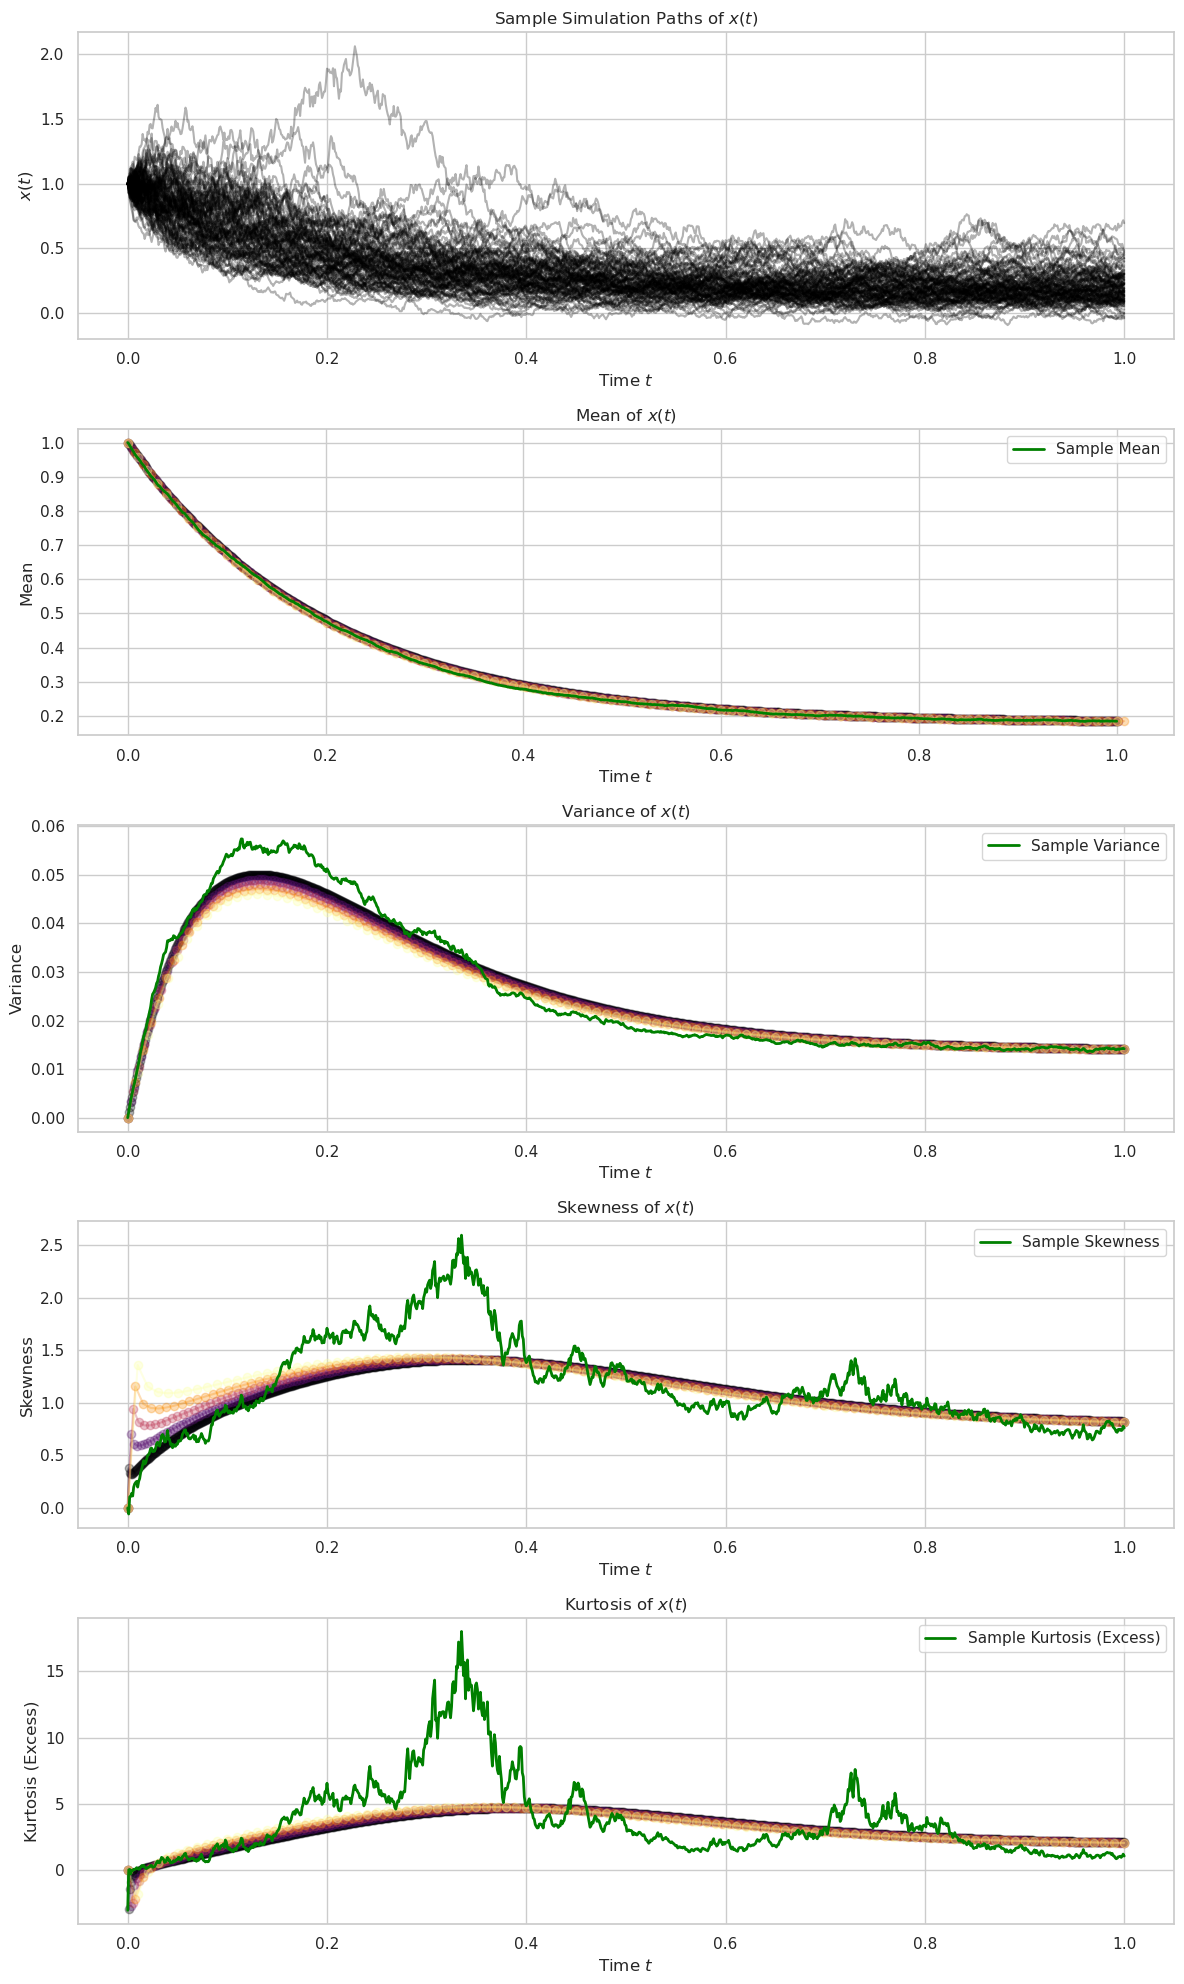

In [ ]:
# Define parameters
u0 = 1.0           # Initial first moment
u0_squared = 1.0   # Initial second moment
u0_cubed = 1.0     # Initial third moment
u0_quad = 1.0      # Initial fourth moment
t0 = 0             # Start time
tend = 1.0         # End time
a = 5
b = 1
c = 0.3
f = 0.9

# Simulate the SDE for multiple paths
def simulate_sde_paths(num_paths, t0, tend, dt, a, b, c, f, x0):
    N = int((tend - t0) / dt)  # Number of time steps
    t = np.linspace(t0, tend, N + 1)
    x_paths = np.zeros((num_paths, N + 1))
    x_paths[:, 0] = x0  # Initial condition for all paths

    # Generate Wiener increments
    dWb = np.sqrt(dt) * np.random.randn(num_paths, N)
    dWc = np.sqrt(dt) * np.random.randn(num_paths, N)

    # Euler-Maruyama method for each path
    for i in range(1, N + 1):
        x_paths[:, i] = x_paths[:, i - 1] + (-a * x_paths[:, i - 1] + f) * dt + b * x_paths[:, i - 1] * dWb[:, i - 1] + c * dWc[:, i - 1]

    return t, x_paths

# Define the differential equation for d(EX_t)/dt (first moment)
def question_2_d_dt_first_moment(a, EXt, f):
    return -a * EXt + f

# Forward Euler approximation for given parameters
def question_2_first_moment_forward_euler(u0, t0, tend, h, a, f):
    t_values = np.arange(t0, tend + h, h)
    y_first_moment = np.zeros(len(t_values))
    y_first_moment[0] = u0

    for i in range(1, len(t_values)):
        y_first_moment[i] = y_first_moment[i - 1] + h * question_2_d_dt_first_moment(a, y_first_moment[i - 1], f)
    
    return t_values, y_first_moment

# Differential equation for the time derivative of the second moment
def question_2_d_dt_second_moment(a, b, c, f, EXt, EXt2):
    return (-2*a + b**2)*EXt2 + (2*f*EXt) + (c**2)

# Forward Euler approximation for the second moment
def question_2_second_moment_forward_euler(u0, u0_squared, t0, tend, h, a, b, c, f):

    time_steps = int((tend - t0) / h)
    t_values = np.linspace(t0, tend, time_steps + 1)
    
    y_first_moment = np.zeros(time_steps + 1)
    y_second_moment = np.zeros(time_steps + 1)
    
    # Initial conditions
    y_first_moment[0] = u0
    y_second_moment[0] = u0_squared

    # Forward Euler for both first and second moments
    for i in range(1, time_steps + 1):
        y_first_moment[i] = y_first_moment[i - 1] + h * (-a * y_first_moment[i - 1] + f)
        y_second_moment[i] = y_second_moment[i - 1] + h * question_2_d_dt_second_moment(a, b, c, f, y_first_moment[i - 1], y_second_moment[i - 1])
    
    variance_approx = (y_second_moment - y_first_moment**2)
    return t_values, variance_approx

def question_2_d_dt_third_moment(a, b, c, f, EXt, EXt2, EXt3):
    return -3 * (a - b**2) * EXt3 + 3 * f * EXt2 + 3 * c**2 * EXt

def question_2_third_moment_forward_euler(u0, u0_squared, u0_cubed, t0, tend, h, a, b, c, f):
    time_steps = int((tend - t0) / h)
    t_values = np.linspace(t0, tend, time_steps + 1)
    
    y_first_moment = np.zeros(time_steps + 1)
    y_second_moment = np.zeros(time_steps + 1)
    y_third_moment = np.zeros(time_steps + 1)
    
    # Initial conditions
    y_first_moment[0] = u0
    y_second_moment[0] = u0_squared
    y_third_moment[0] = u0_cubed

    # Forward Euler for each time step
    for i in range(1, time_steps + 1):
        # First moment
        y_first_moment[i] = y_first_moment[i - 1] + h * question_2_d_dt_first_moment(
            a, y_first_moment[i - 1], f
        )
        
        # Second moment
        y_second_moment[i] = y_second_moment[i - 1] + h * question_2_d_dt_second_moment(
            a, b, c, f, y_first_moment[i - 1], y_second_moment[i - 1]
        )
        
        # Third moment
        y_third_moment[i] = y_third_moment[i - 1] + h * question_2_d_dt_third_moment(
            a, b, c, f, y_first_moment[i - 1], y_second_moment[i - 1], y_third_moment[i - 1]
        )

    # Calculate central moments for skewness
    central_second_moment = y_second_moment - y_first_moment**2
    central_third_moment = (
        y_third_moment - 
        3 * y_first_moment * y_second_moment + 
        2 * y_first_moment**3
    )
    
    # Calculate skewness with numerical stability
    skewness = np.zeros_like(central_second_moment)
    mask = central_second_moment > 1e-10
    std_dev = np.sqrt(central_second_moment[mask])
    skewness[mask] = central_third_moment[mask] / (std_dev**3)
    
    return t_values, skewness

def question_2_d_dt_fourth_moment(a, b, c, f, EXt2, EXt3, EXt4):
    return ((-4*a + 6*b**2) * EXt4) + (4*f * EXt3) + (6*c**2 * EXt2)

def question_2_fourth_moment_forward_euler(u0, u0_squared, u0_cubed, u0_quad, t0, tend, h, a, b, c, f):
    time_steps = int((tend - t0) / h)
    t_values = np.linspace(t0, tend, time_steps + 1)
    
    y_first_moment = np.zeros(time_steps + 1)
    y_second_moment = np.zeros(time_steps + 1)
    y_third_moment = np.zeros(time_steps + 1)
    y_fourth_moment = np.zeros(time_steps + 1)
    
    # Initial conditions
    y_first_moment[0] = u0
    y_second_moment[0] = u0_squared
    y_third_moment[0] = u0_cubed
    y_fourth_moment[0] = u0_quad

    # Forward Euler for each time step
    for i in range(1, time_steps + 1):
        # First moment
        y_first_moment[i] = y_first_moment[i - 1] + h * question_2_d_dt_first_moment(
            a, y_first_moment[i - 1], f
        )
        
        # Second moment
        y_second_moment[i] = y_second_moment[i - 1] + h * question_2_d_dt_second_moment(
            a, b, c, f, y_first_moment[i - 1], y_second_moment[i - 1]
        )
        
        # Third moment
        y_third_moment[i] = y_third_moment[i - 1] + h * question_2_d_dt_third_moment(
            a, b, c, f, y_first_moment[i - 1], y_second_moment[i - 1], y_third_moment[i - 1]
        )
        
        # Fourth moment
        y_fourth_moment[i] = y_fourth_moment[i - 1] + h * question_2_d_dt_fourth_moment(
            a, b, c, f, y_second_moment[i - 1], y_third_moment[i - 1], y_fourth_moment[i - 1]
        )

    # Calculate central moments for kurtosis
    central_second_moment = y_second_moment - y_first_moment**2
    central_fourth_moment = (
        y_fourth_moment - 
        4 * y_first_moment * y_third_moment + 
        6 * y_first_moment**2 * y_second_moment - 
        3 * y_first_moment**4
    )
    
    # Calculate excess kurtosis with numerical stability
    kurtosis = np.zeros_like(central_second_moment)
    mask = central_second_moment > 1e-10
    variance_squared = central_second_moment[mask]**2
    kurtosis[mask] = (central_fourth_moment[mask] / variance_squared) - 3
    
    return t_values, kurtosis

# Run the simulations first
num_paths = 1000
t, x_paths = simulate_sde_paths(num_paths, t0, tend, 0.001, a, b, c, f, u0)

# Calculate the sample mean and higher moments from simulated paths with numerical stability
mean_x = np.mean(x_paths, axis=0)
variance_x = np.var(x_paths, axis=0)

# Adding small tolerance to avoid division by zero in skewness and kurtosis calculations
std_dev_x = np.sqrt(variance_x)
std_dev_x[std_dev_x < 1e-10] = 1e-10  # Set a minimum value for standard deviation to avoid zero division
skewness_x = np.mean((x_paths - mean_x) ** 3, axis=0) / (std_dev_x ** 3)

variance_x_sq = variance_x ** 2
variance_x_sq[variance_x_sq < 1e-10] = 1e-10  # Set a minimum value for variance squared
kurtosis_x = np.mean((x_paths - mean_x) ** 4, axis=0) / variance_x_sq - 3

# Plotting the sample statistics and Euler approximations
fig, axs = plt.subplots(5, 1, figsize=(12, 20))

# Define various step sizes for Forward Euler approximations
h_values = np.linspace(0.001, 0.01, 5, endpoint=True)
cmap = cm.get_cmap('inferno')
colors = [cmap(i) for i in np.linspace(0, 1, len(h_values))]

# Plot sample simulation paths
num_plot_paths = 100
for path in x_paths[:num_plot_paths]:
    axs[0].plot(t, path, alpha=0.3, color="black")
axs[0].set_title('Sample Simulation Paths of $x(t)$')
axs[0].set_xlabel('Time $t$')
axs[0].set_ylabel('$x(t)$')

# Plot Euler approximations for different step sizes and overlay sample statistics
for i, h_step in enumerate(h_values):
    
    # Mean
    t_mean_approx, mean_approx = question_2_first_moment_forward_euler(u0, t0, tend, h_step, a, f)
    axs[1].plot(t_mean_approx, mean_approx, color=colors[i], alpha=0.3, marker="o")
    
    # Variance
    t_variance_approx, variance_approx = question_2_second_moment_forward_euler(u0, u0_squared, t0, tend, h_step, a, b, c, f)
    axs[2].plot(t_variance_approx, variance_approx, color=colors[i], alpha=0.3, marker="o")
    
    # Skewness
    t_skewness_approx, skewness_approx = question_2_third_moment_forward_euler(u0, u0_squared, u0_cubed, t0, tend, h_step, a, b, c, f)
    axs[3].plot(t_skewness_approx, skewness_approx, color=colors[i], alpha=0.3, marker="o")
    
    # Kurtosis
    t_kurtosis_approx, kurtosis_approx = question_2_fourth_moment_forward_euler(u0, u0_squared, u0_cubed, u0_quad, t0, tend, h_step, a, b, c, f)
    axs[4].plot(t_kurtosis_approx, kurtosis_approx, color=colors[i], alpha=0.3, marker="o")

# Overlay sample statistics for each subplot
axs[1].plot(t, mean_x, color='green', linestyle='-', linewidth=2, label='Sample Mean')
axs[1].set_title('Mean of $x(t)$')
axs[1].set_xlabel('Time $t$')
axs[1].set_ylabel('Mean')
axs[1].legend()

axs[2].plot(t, variance_x, color='green', linestyle='-', linewidth=2, label='Sample Variance')
axs[2].set_title('Variance of $x(t)$')
axs[2].set_xlabel('Time $t$')
axs[2].set_ylabel('Variance')
axs[2].legend()

axs[3].plot(t, skewness_x, color='green', linestyle='-', linewidth=2, label='Sample Skewness')
axs[3].set_title('Skewness of $x(t)$')
axs[3].set_xlabel('Time $t$')
axs[3].set_ylabel('Skewness')
axs[3].legend()

axs[4].plot(t, kurtosis_x, color='green', linestyle='-', linewidth=2, label='Sample Kurtosis (Excess)')
axs[4].set_title('Kurtosis of $x(t)$')
axs[4].set_xlabel('Time $t$')
axs[4].set_ylabel('Kurtosis (Excess)')
axs[4].legend()

plt.tight_layout()
plt.show()

# Question 3.

**Consider a linear SDE with multiplicative noise. If our target distribution is the uniform distribution:**

$$p(x) = \frac{1}{c-b}, \quad b < x < c,$$

**Then prove that the multiplicative noise in the corresponding SDE has the following form:**

$$dx(t) = -\lambda \bigg(x(t) - \frac{b+c}{2}\bigg)\;dt + \sqrt{\lambda (x-b) (c-x)}\;dW(t)$$

The general form of the multiplicative noise can be written as:
$$d\;x(t) = A(x)\;dt + B(x) \; dW(t)$$

Applying Fokker-Planck, we know that:
\begin{equation*}
    \begin{split}
        \frac{\partial \;p(x,t)}{\partial t} &= -\frac{\partial}{\partial x} \bigg(A(x) \cdot \frac{1}{c-b} \bigg) + \frac{1}{2} \cdot \frac{\partial^2}{\partial x^2} \cdot \bigg(B(x)^2 \cdot \frac{1}{c-b}\bigg)\\
                                            &= -\frac{1}{c-b} \cdot A'(x) + \frac{1}{2} \cdot \frac{1}{c-b} \cdot \frac{\partial^2}{\partial x^2} \cdot B(x)^2\\
    \end{split}
\end{equation*}

Given $p(x)$ follows a uniform distribution, i.e.,
$$\frac{\partial \;p(x,t)}{\partial t} = 0$$

Therefore, after simplification, we have that:
\begin{equation*}
    \begin{split}
        0      &= -\frac{A'(x)}{c-b} + \frac{1}{2(c-b)} \cdot \frac{\partial^2}{\partial x^2} \cdot B(x)^2\\
        2 \cdot A'(x)  &= \frac{\partial^2}{\partial x^2} \cdot B(x)^2\\
    \end{split}
\end{equation*}

Now suppose $A(x) = \displaystyle \lambda \cdot \bigg(x - \frac{b+c}{2}\bigg)$, then we have that:
\begin{equation*}
    \begin{split}
        A(x)  &= -\lambda \cdot \bigg(x - \frac{b+c}{2}\bigg)\\
              &= -\lambda x - \frac{\lambda(b+c)}{2}\\
        A'(x) &= -\lambda\\
        2A'(x) &= -2\lambda 
    \end{split}
\end{equation*}

Similarly suppose $B(x) = \displaystyle \sqrt{\lambda (x-b)(c-x)}$, then we have that:
\begin{equation*}
    \begin{split}
        B(x)^2 &= \lambda \cdot (x-b) \cdot (c-x)\\
               &= \lambda (cx - x^2 - bc + bx)\\
               &= \lambda cx - \lambda x^2 - \lambda bc + \lambda bx\\
        \\
        \frac{\partial}{\partial x} B(x)^2 &= \lambda c - 2 \lambda x - 0 + \lambda b\\
        \\
        \frac{\partial^2}{\partial x^2} B(x)^2 &= -2 \lambda
    \end{split}
\end{equation*}

as required

# Question 4.

**Consider the following linear Gaussian model:**

$$d\;X(t) = [-a \cdot X(t) + f]\;dt + \sigma\;dW(t),$$

**with parameters $a=0.5$, $f=1$, and $\sigma=0.4$.**

From question 1., we know that:

*Time-evolution of the mean:*
\begin{equation*}
    \begin{split}
        \frac{d}{dt} \mathbb{E}[X(t)] &= -a \cdot \mathbb{E}[X(t)] + f\\
    \end{split}
\end{equation*}

*Time-evolution of the second-moment:*
\begin{equation*}
    \begin{split}
        \frac{d}{dt} \mathbb{E}[X_t^2] &= -2a \cdot \mathbb{E}[X^2_t] + 2\mathbb{E}[X_t f] + \sigma^2\\
    \end{split}
\end{equation*}

The Shannon's entropy (as a function of time) can be explicilty written down as:
\begin{equation*}
    \begin{split}
        H(x) &= -\int p(x) \cdot \text{log}(x)\;dx\\
             &= -\mathbb{E}\bigg[\text{log}\bigg(\frac{1}{\sqrt{2\pi \sigma^2}} \cdot \text{exp}\bigg(-\frac{1}{2\sigma^2}(x - \mu^2)\bigg)\bigg)\bigg]\\
             &= \frac{1}{2} \cdot \text{log}(2 \pi \sigma^2) + \frac{1}{2\sigma^2} \mathbb{E}[(x - \mu)^2]\\
             &= \frac{1}{2} \cdot \text{log}(2\pi \sigma^2) + \frac{1}{2}
    \end{split}
\end{equation*}

*Note: we can see that the shannons entropy for gaussian distribution depends only on variance $\sigma^2$ and not the mean $\mu$.*

In [4]:
# Define the SDE function
def question_4_dXt(Xt, dt, dWt, a, f):
    return (-a * Xt + f) * dt + dWt

# Euler-Maruyama method to simulate paths
def question_4_euler_maruyama(T, N, X0, a, f, sigma, num_simulations):
    dt = T / N
    t = np.linspace(0, T, N + 1)
    Xt = np.zeros((num_simulations, N + 1))
    Xt[:, 0] = X0  # Initial condition
    
    for i in range(1, N + 1):
        dW = np.sqrt(dt) * np.random.randn(num_simulations) * sigma  # Wiener process increment
        Xt[:, i] = Xt[:, i - 1] + question_4_dXt(Xt[:, i - 1], dt, dW, a, f)  # Euler-Maruyama scheme
    
    return t, Xt

# Define the differential equation for d(EX_t)/dt (first moment)
def question_4_d_dt_first_moment(a, EXt, f):
    return (-a * EXt + f)

# Define the differential equation for d(EX_t^2)/dt (second moment)
def question_4_d_dt_second_moment(a, EXt, EXt2, f, sigma):
    return (-2 * a * EXt2 + 2 * EXt * f + sigma ** 2)

# Define the Forward Euler method for both first and second moments
def question_4_forward_euler_moments(a, f, sigma, m_0, m2_0, dt, T):
    time_steps = int(T / dt)
    m_values = np.zeros(time_steps + 1)    # First moment values
    m2_values = np.zeros(time_steps + 1)   # Second moment values
    t_values = np.linspace(0, T, time_steps + 1)
    
    # Initial conditions
    m_values[0] = m_0
    m2_values[0] = m2_0
    
    # Euler method loop for both moments
    for i in range(1, time_steps + 1):
        
        # Update first moment (mean) using its differential equation
        m_values[i] = m_values[i - 1] + dt * question_4_d_dt_first_moment(a, m_values[i - 1], f)
        
        # Update second moment using its differential equation
        m2_values[i] = m2_values[i - 1] + dt * question_4_d_dt_second_moment(a, m_values[i - 1], m2_values[i - 1], f, sigma)
    
    variance_approx = m2_values - m_values**2

    return t_values, variance_approx

# Compute Shannon entropy over time with a sliding window
def shannon_entropy_gaussian(variance):
    entropy = 0.5 * np.log(2 * np.pi * np.e * variance)
    return entropy

## (a.)

**The initial value is given by a Gaussian distribution with mean $0$ and variance $0.01$.**

**Write down the time evolution of the mean and variance. Then, compute Shannon's entropy as a function of time.**

Now, we know that:
$$X(0) \sim N(0, 0.01) \implies \mathbb{E}[X(0)] = 0, \quad \text{Var}(X(0)) = 0.01$$

For time evolution of mean, we solve the ODE and find that the solution of the ODE is:
$$\mathbb{E}[X(t)] = \frac{f}{a} \cdot \big(1-\text{exp}(-at)\big) + \text{exp}(-at)$$

For time evolution of variance, we use forward euler and the fact that:
$$\text{Var}(X(t)) = \mathbb{E}[X(t)^2] - \mathbb{E}[X(t)^2]$$

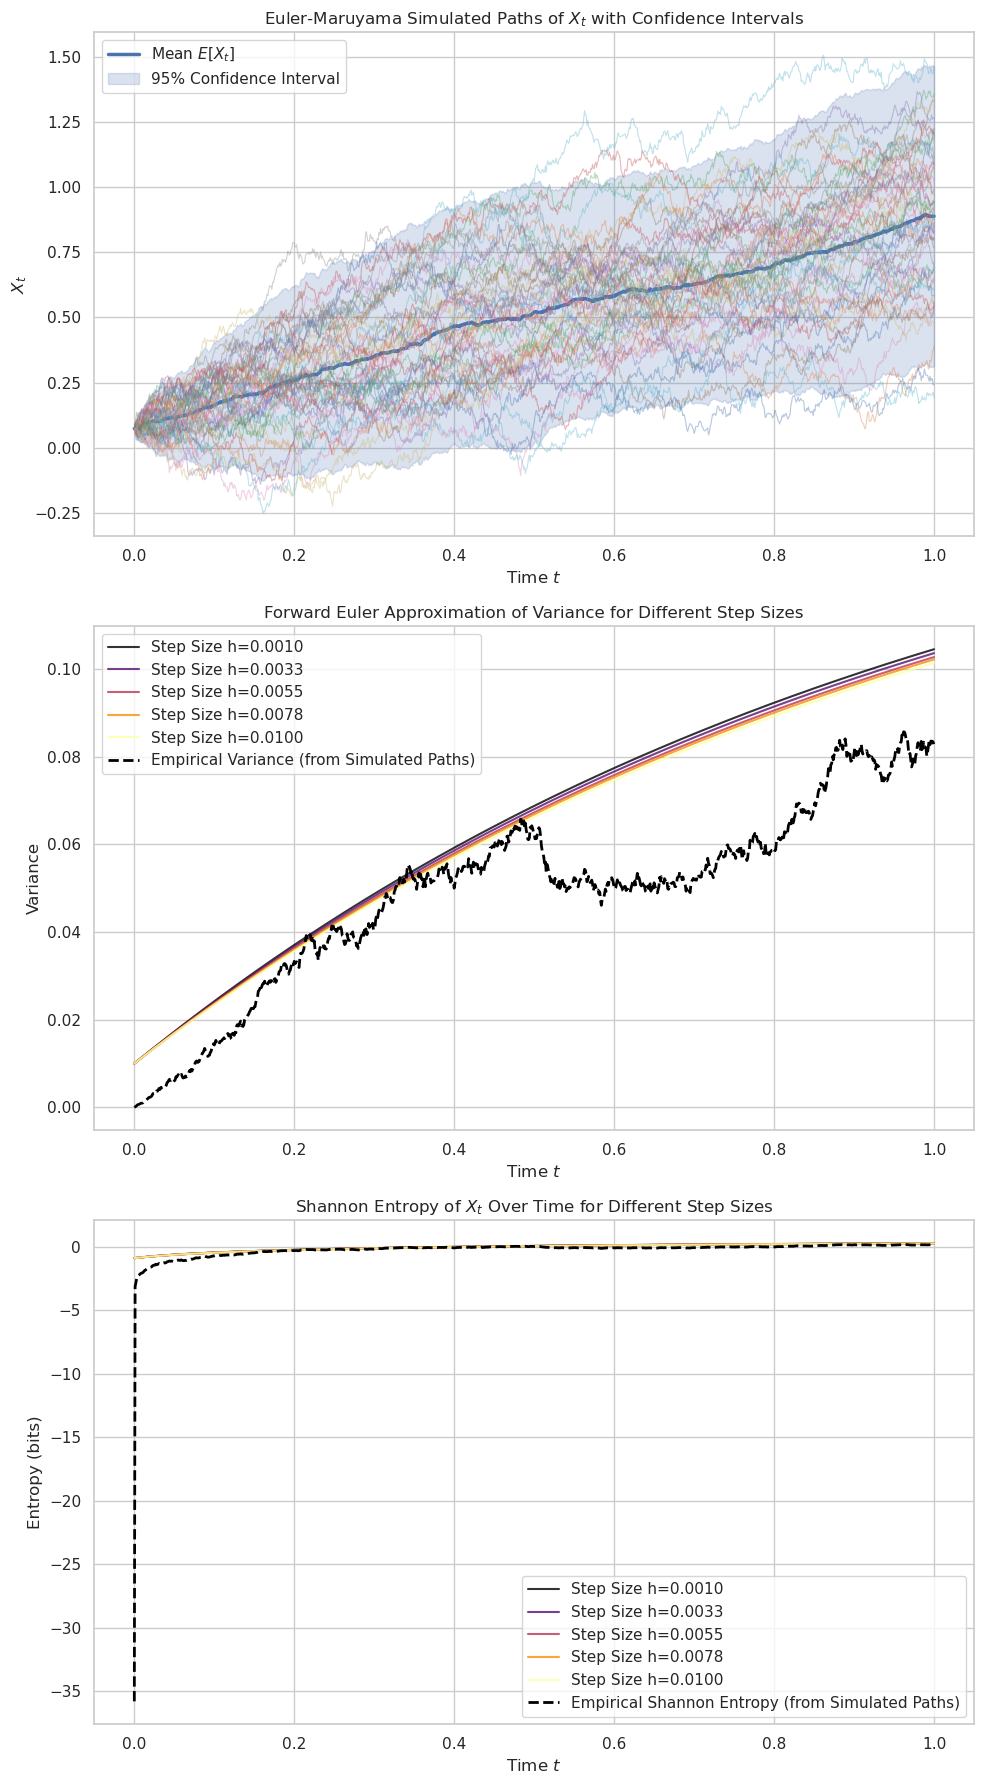

In [5]:
# Parameters
a = 0.5
f = 1
sigma = 0.4
T = 1.0
N = 1000
num_simulations = 50
dt = T / N

# Step 1: Sample initial point X0 from N(0, 0.01)
X0 = np.random.normal(0, np.sqrt(0.01))

# Initial mean and variance
m_0 = 0                  # Mean at t=0
var_0 = 0.01             # Variance at t=0

# Simulate paths using Euler-Maruyama schema
t, Xt_paths = question_4_euler_maruyama(T, N, X0, a, f, sigma, num_simulations)
mean_Xt = np.mean(Xt_paths, axis=0)
std_dev_Xt = np.std(Xt_paths, axis=0)

# Calculate empirical variance of simulated paths
empirical_variance = np.var(Xt_paths, axis=0)

# Step sizes for variance approximation
h_values = np.linspace(0.001, 0.01, 5, endpoint=True)
cmap = cm.get_cmap('inferno')
colors = [cmap(i) for i in np.linspace(0, 1, len(h_values))]

# Shannon entropy function for Gaussian
def shannon_entropy_gaussian(variance):
    return 0.5 * np.log(2 * np.pi * np.e * variance)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot 1: Euler-Maruyama Simulated Paths with Confidence Intervals
axs[0].plot(t, mean_Xt, color=sns.color_palette("deep")[0], linewidth=2.5, label='Mean $E[X_t]$')
axs[0].fill_between(t, mean_Xt - 2 * std_dev_Xt, mean_Xt + 2 * std_dev_Xt, 
                    color=sns.color_palette("deep")[0], alpha=0.2, label='95% Confidence Interval')
for i in range(num_simulations):
    axs[0].plot(t, Xt_paths[i], lw=0.8, alpha=0.4)
axs[0].set_title("Euler-Maruyama Simulated Paths of $X_t$ with Confidence Intervals")
axs[0].set_xlabel("Time $t$")
axs[0].set_ylabel("$X_t$")
axs[0].legend()

# Plot 2: Forward Euler Approximation of Variance with Different Step Sizes and Empirical Variance
for i, h_step in enumerate(h_values):
    t_variance_approx, variance_approx = question_4_forward_euler_moments(a, f, sigma, m_0=0, m2_0=0.01, dt=h_step, T=T)
    axs[1].plot(t_variance_approx, variance_approx, color=colors[i], alpha=0.8, linewidth=1.5, label=f'Step Size h={h_step:.4f}')
axs[1].plot(t, empirical_variance, color="black", linestyle="--", linewidth=2, label="Empirical Variance (from Simulated Paths)")
axs[1].set_title("Forward Euler Approximation of Variance for Different Step Sizes")
axs[1].set_xlabel("Time $t$")
axs[1].set_ylabel("Variance")
axs[1].legend()

# Plot 3: Shannon Entropy for Different Variance Approximations and Empirical Shannon Entropy
for i, h_step in enumerate(h_values):
    t_entropy_approx, variance_approx = question_4_forward_euler_moments(a, f, sigma, m_0=0, m2_0=0.01, dt=h_step, T=T)
    entropy_approx = shannon_entropy_gaussian(variance_approx)
    axs[2].plot(t_entropy_approx, entropy_approx, color=colors[i], alpha=0.8, linewidth=1.5, label=f'Step Size h={h_step:.4f}')
empirical_entropy = shannon_entropy_gaussian(empirical_variance)
axs[2].plot(t, empirical_entropy, color="black", linestyle="--", linewidth=2, label="Empirical Shannon Entropy (from Simulated Paths)")
axs[2].set_title("Shannon Entropy of $X_t$ Over Time for Different Step Sizes")
axs[2].set_xlabel("Time $t$")
axs[2].set_ylabel("Entropy (bits)")
axs[2].legend()

plt.tight_layout()
plt.show()

## (b.)

**Then change the initial value to another Gaussian distribution with mean $1$ and variance $0.01$.** 

**Repeat the above procedure to see if the time evolution of Shannon’s entropy is different.**

Now, we know that:
$$X(0) \sim N(1, 0.01) \implies \mathbb{E}[X(0)] = 1$$

For time evolution of mean, we solve the ODE and find that the solution of the ODE is:
$$\mathbb{E}[X(t)] = \text{exp}(-at) + \frac{f}{a} (1 - \text{exp}(-at))$$

For time evolution of variance, we use forward euler and the fact that:
$$\text{Var}(X(t)) = \mathbb{E}[X(t)^2] - \mathbb{E}[X(t)^2]$$

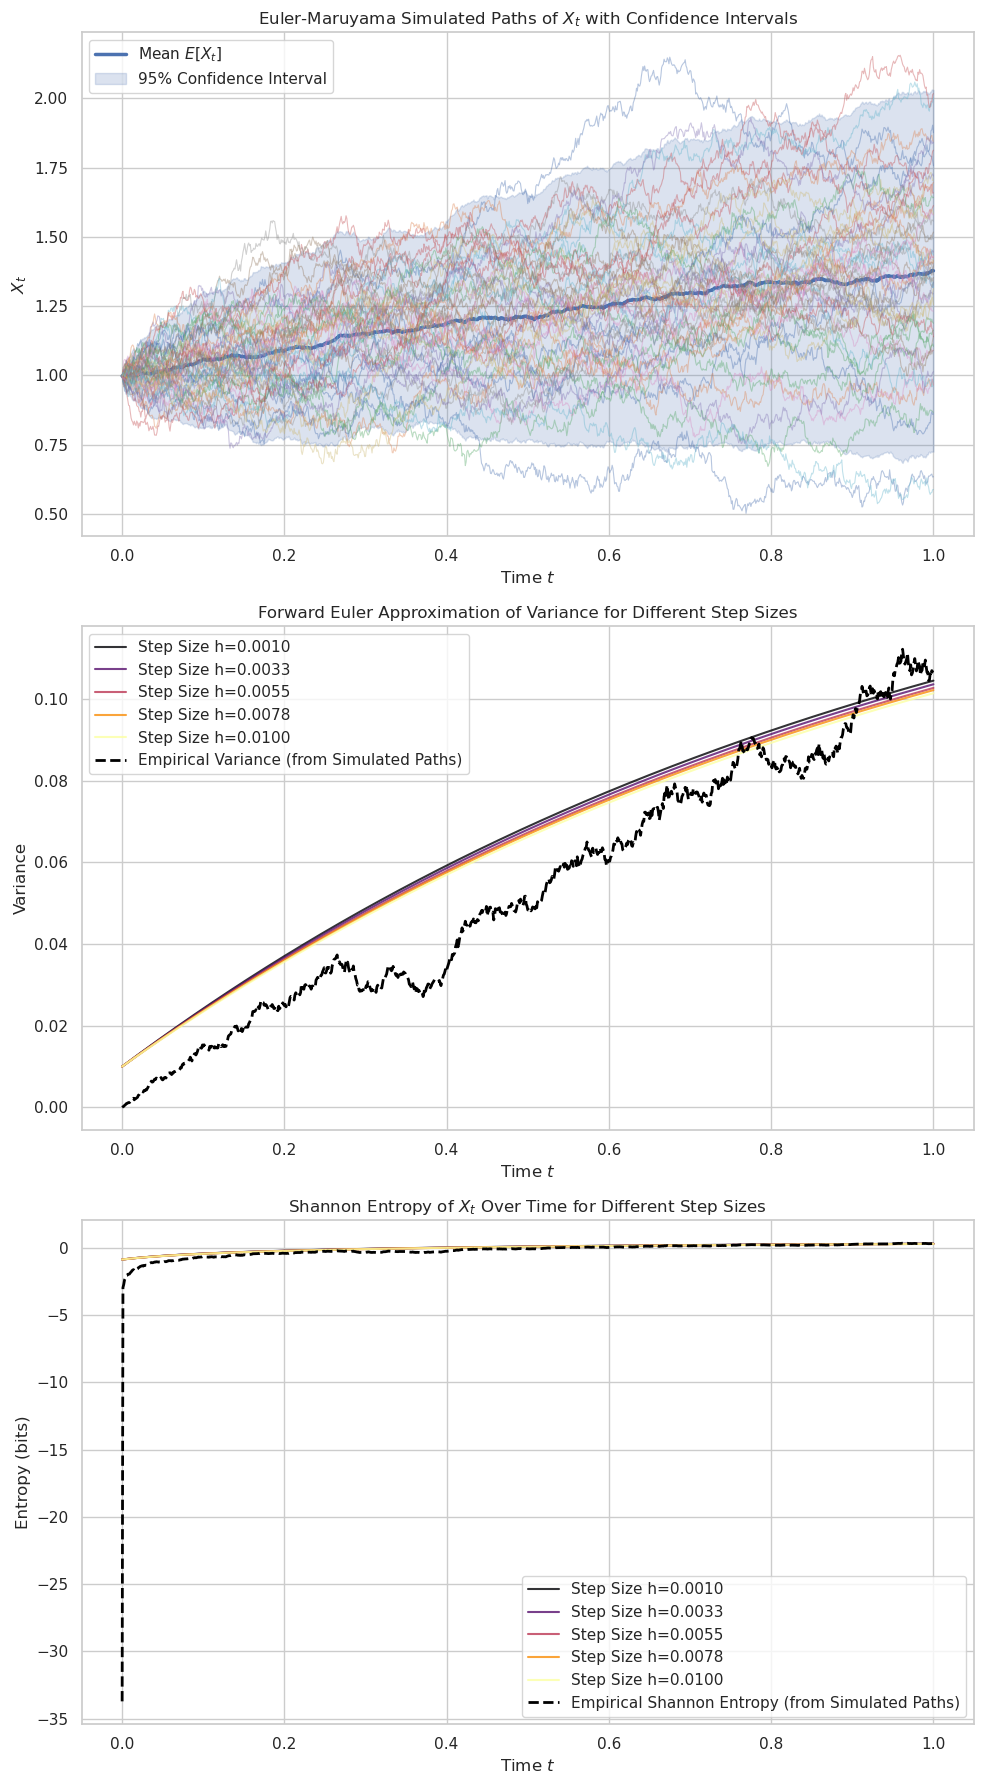

In [6]:
# Parameters
a = 0.5
f = 1
sigma = 0.4
T = 1.0
N = 1000
num_simulations = 50
dt = T / N

# Step 1: Sample initial point X0 from N(0, 0.01)
X0 = np.random.normal(1, np.sqrt(0.01))

# Initial mean and variance
m_0 = 1                  # Mean at t=0
var_0 = 0.01             # Variance at t=0

# Simulate paths using Euler-Maruyama schema
t, Xt_paths = question_4_euler_maruyama(T, N, X0, a, f, sigma, num_simulations)
mean_Xt = np.mean(Xt_paths, axis=0)
std_dev_Xt = np.std(Xt_paths, axis=0)

# Calculate empirical variance of simulated paths
empirical_variance = np.var(Xt_paths, axis=0)

# Step sizes for variance approximation
h_values = np.linspace(0.001, 0.01, 5, endpoint=True)
cmap = cm.get_cmap('inferno')
colors = [cmap(i) for i in np.linspace(0, 1, len(h_values))]

# Shannon entropy function for Gaussian
def shannon_entropy_gaussian(variance):
    return 0.5 * np.log(2 * np.pi * np.e * variance)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot 1: Euler-Maruyama Simulated Paths with Confidence Intervals
axs[0].plot(t, mean_Xt, color=sns.color_palette("deep")[0], linewidth=2.5, label='Mean $E[X_t]$')
axs[0].fill_between(t, mean_Xt - 2 * std_dev_Xt, mean_Xt + 2 * std_dev_Xt, 
                    color=sns.color_palette("deep")[0], alpha=0.2, label='95% Confidence Interval')
for i in range(num_simulations):
    axs[0].plot(t, Xt_paths[i], lw=0.8, alpha=0.4)
axs[0].set_title("Euler-Maruyama Simulated Paths of $X_t$ with Confidence Intervals")
axs[0].set_xlabel("Time $t$")
axs[0].set_ylabel("$X_t$")
axs[0].legend()

# Plot 2: Forward Euler Approximation of Variance with Different Step Sizes and Empirical Variance
for i, h_step in enumerate(h_values):
    t_variance_approx, variance_approx = question_4_forward_euler_moments(a, f, sigma, m_0=0, m2_0=0.01, dt=h_step, T=T)
    axs[1].plot(t_variance_approx, variance_approx, color=colors[i], alpha=0.8, linewidth=1.5, label=f'Step Size h={h_step:.4f}')
axs[1].plot(t, empirical_variance, color="black", linestyle="--", linewidth=2, label="Empirical Variance (from Simulated Paths)")
axs[1].set_title("Forward Euler Approximation of Variance for Different Step Sizes")
axs[1].set_xlabel("Time $t$")
axs[1].set_ylabel("Variance")
axs[1].legend()

# Plot 3: Shannon Entropy for Different Variance Approximations and Empirical Shannon Entropy
for i, h_step in enumerate(h_values):
    t_entropy_approx, variance_approx = question_4_forward_euler_moments(a, f, sigma, m_0=0, m2_0=0.01, dt=h_step, T=T)
    entropy_approx = shannon_entropy_gaussian(variance_approx)
    axs[2].plot(t_entropy_approx, entropy_approx, color=colors[i], alpha=0.8, linewidth=1.5, label=f'Step Size h={h_step:.4f}')
empirical_entropy = shannon_entropy_gaussian(empirical_variance)
axs[2].plot(t, empirical_entropy, color="black", linestyle="--", linewidth=2, label="Empirical Shannon Entropy (from Simulated Paths)")
axs[2].set_title("Shannon Entropy of $X_t$ Over Time for Different Step Sizes")
axs[2].set_xlabel("Time $t$")
axs[2].set_ylabel("Entropy (bits)")
axs[2].legend()

plt.tight_layout()
plt.show()

As expected, there is not difference between Shannon entropy between initial value $N(0, 0.0.01)$ and $N(1, 0.01)$. This is due to the fact that the variance is still the same and mean has no affect in gaussian distributed Shannon entropy. 